In [42]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten

In [43]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [44]:
X_train.shape

(60000, 28, 28)

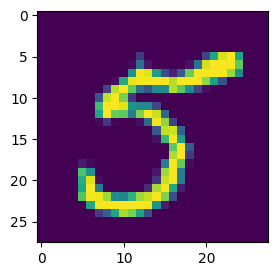

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.imshow(X_train[np.random.randint(0, 60000)])

In [46]:
X_train = X_train/255
X_test = X_test/255

In [47]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [48]:
# the data in 2d we need to flatten
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [49]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [51]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.4857 - val_loss: 0.1546
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1328 - val_loss: 0.1180
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0895 - val_loss: 0.1061
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0604 - val_loss: 0.0910
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0465 - val_loss: 0.0884
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0384 - val_loss: 0.0954
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0284 - val_loss: 0.1012
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0226 - val_loss: 0.0961
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0191 - val_loss: 0.0890
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0136 - val_loss: 0.0987


In [53]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [54]:
y_pred = y_prob.argmax(axis=1)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9746

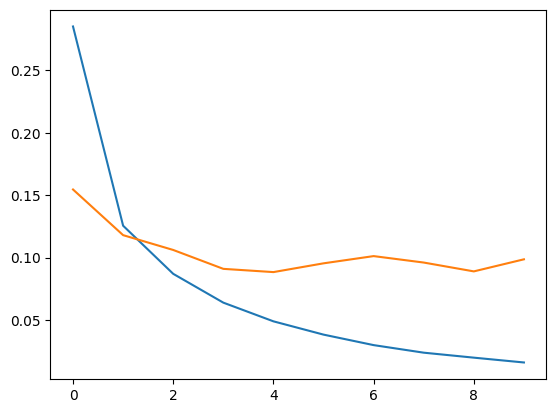

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[7]


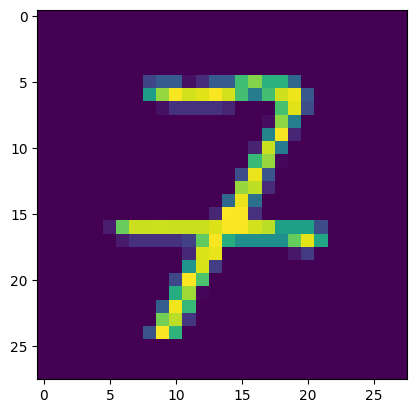

In [66]:
k = np.random.randint(0, 10000)
plt.imshow(X_test[k])
print(model.predict(X_test[k].reshape(1,28,28)).argmax(axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


array([1], dtype=int64)